<a href="https://colab.research.google.com/github/itsasoblg/DIPC/blob/master/BilayerGrapheneTwisted27-06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twisted Bilayer Graphene

In this notebook, we will try to model a system of bilayer graphene.

In [1]:
!pip install sisl

     |████████████████████████████████| 2.2MB 2.8MB/s 
     |████████████████████████████████| 4.1MB 33.8MB/s 
     |████████████████████████████████| 307kB 54.6MB/s 
  Stored in directory: /root/.cache/pip/wheels/52/c2/d2/6f4b6f5c4fb605ba27bac0a070481b3862f2638cfa08c5ea1d
Successfully built sisl


In [0]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
import cmath
from google.colab import files
import sisl
from sisl import *
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

# AA stacking

We will start with the simplest model, AA stacking. 

Geometry{na: 4, no: 4,
 Atoms{species: 1,
  Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
   Orbital{R: 1.43420, q0: 0.0}
  }: 4,
 },
 maxR: 1.43420,
 SuperCell{volume: 1.4878e+02, nsc: [3 3 1]}
}
[[ 0.    0.    0.  ]
 [ 1.42  0.    0.  ]
 [ 0.    0.   14.2 ]
 [ 1.42  0.   14.2 ]]


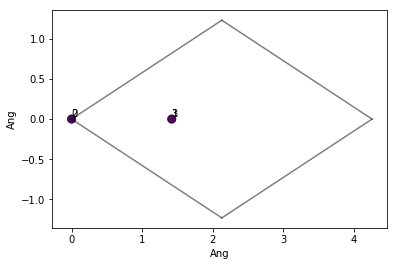

In [3]:
aa = sisl.geom.graphene().tile(1,0).tile(2,2)

#gnr.tile(reps = 20,axis=1)

print(aa)

plot(aa,atom_indices= True)

print(aa.xyz)


#separating the coordinates into arrays so that we can 3D plot them 

xarray = aa.xyz[:,0]

yarray = aa.xyz[:,1]

zarray = aa.xyz[:,2]


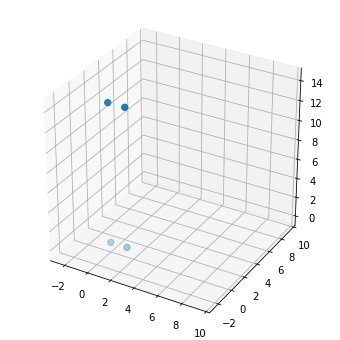

In [4]:
#now we want to plot our grid in 3D

#the scatter plot below shows the positions of the two layers of graphene

fig = plt.figure(figsize= (10,6))
ax = plt.axes(projection='3d')

ax.scatter3D(xarray, yarray, zarray, s = 40)
plt.xlim(-3, 10)
plt.ylim(-3, 10)

plt.gca().set_aspect('equal', adjustable='box') 
plt.draw()

In [5]:
#calculation the band structure of bilayer graphene

#we first construct a blank canvas for the Hamiltonian

H = Hamiltonian(aa)

#now we need to set its values 

#we loop the Hamiltonian


"""  
  np.where(H.geom.xyz[idx[2],2] == H.geom.xyz[ia,2], H[io,idx[2]] ,H[io,idx[2]] = -0.4)""" 

#we want the loop to IGNORE the atoms in the same layer

for ia in aa:
  idx, xyz = aa.close(ia, R = [0.1, 1.43, 14.2], ret_xyz = True)
  
  H[ia,idx[0]] = 0
  H[ia,idx[1]] = -2.7
  
  
  #i dont know how I would implement this info
  print(idx[2])
  print(xyz[2][:,2])
  
  if xyz[2][:,2] == aa.xyz[:,2]:
    H[ia,idx[2]] = 0
  else:
    H[ia,idx[2]] = -0.4
  

  
    
print(H)

    
    

[ 2  4  5  8 12 13 16 20 21 24 25 28 29 32 33]
[14.2  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0. ]
[ 3  4  5  8  9 12 13 16 17 21 24 25 29 32 33]
[14.2  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0. ]
[ 0  6  7 10 14 15 18 22 23 26 27 30 31 34 35]
[ 0.  14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2
 14.2]
[ 1  6  7 10 11 14 15 18 19 23 26 27 31 34 35]
[ 0.  14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2 14.2
 14.2]
Hamiltonian{non-zero: 76, orthogonal: True,
 Spin{unpolarized, kind=f},
 Geometry{na: 4, no: 4,
  Atoms{species: 1,
   Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
    Orbital{R: 1.43420, q0: 0.0}
   }: 4,
  },
  maxR: 1.43420,
  SuperCell{volume: 1.4878e+02, nsc: [3 3 1]}
 }
}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


## Links to examples in Hamiltonian loops

[Example 1](https://github.com/zerothi/sisl/blob/master/examples/ex_01.py)

[Tutorial 4](https://github.com/zerothi/ts-tbt-sisl-tutorial/blob/aeb5763b5199c45adebe0b9b4da41eb672b60032/TB_04/run.ipynb)

In [0]:
band = BandStructure(H, [[0, 0, 0], [0, 0.5, 0],
                         [1/3, 2/3, 0], [0, 0, 0]], 400,
                        [r'$\Gamma$', r'$M$',
                         r'$K$', r'$\Gamma$'])


eigs = band.eigh()

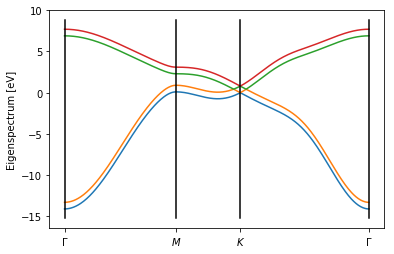

In [7]:
xtick, xtick_label = band.lineartick() #points where the band undergoes changes 
lk = band.lineark() 
plt.plot(lk, eigs)

plt.ylabel('Eigenspectrum [eV]')
plt.gca().xaxis.set_ticks(xtick)
plt.gca().set_xticklabels(xtick_label)

# Also plot x-major lines at the ticks
ymin, ymax = plt.gca().get_ylim()
for tick in xtick:
    plt.plot([tick,tick], [ymin,ymax], 'k')

## Different Method: Appending two layers

Now we will approach this system in a different way. In order to make the model valid for twisted bilayer graphene (at any angle), we can try a method that generates the Hamiltonian for both layers and afterwards appends them. 



In [19]:
#generating the 1st layer
#we will create a layer tiled 3 times in the y-direction and 3 in the x-direction

g1 = sisl.geom.graphene().tile(3,0).tile(3,1)


#generating the 2nd layer
#here we can choose the angle we want it rotated
#30 degrees is clearly seen in the 3D plot below
g2 = g1.rotate(angle = 30, v=[0,0,1])

print(g2.cell)

#appending the geometry layers
gfinal = g1.append(g2, axis = 2)

#gfinal = g1.add(g2) 
#the method ABOVE only adds the atoms together but does not append them along any axis

print(gfinal)

xarray = gfinal.xyz[:,0]

yarray = gfinal.xyz[:,1]

zarray = gfinal.xyz[:,2]

print(gfinal.xyz)

[[ 3.68926822e+00  6.39000000e+00  0.00000000e+00]
 [ 7.37853644e+00 -6.66133815e-16  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.42000000e+01]]
Geometry{na: 36, no: 36,
 Atoms{species: 1,
  Atom{C, Z: 6, mass(au): 12.01070, maxR: 1.43420,
   Orbital{R: 1.43420, q0: 0.0}
  }: 36,
 },
 maxR: 1.43420,
 SuperCell{volume: 1.3390e+03, nsc: [3 3 1]}
}
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 1.42000000e+00  0.00000000e+00  0.00000000e+00]
 [ 2.13000000e+00  1.22975607e+00  0.00000000e+00]
 [ 3.55000000e+00  1.22975607e+00  0.00000000e+00]
 [ 4.26000000e+00  2.45951215e+00  0.00000000e+00]
 [ 5.68000000e+00  2.45951215e+00  0.00000000e+00]
 [ 2.13000000e+00 -1.22975607e+00  0.00000000e+00]
 [ 3.55000000e+00 -1.22975607e+00  0.00000000e+00]
 [ 4.26000000e+00  0.00000000e+00  0.00000000e+00]
 [ 5.68000000e+00  0.00000000e+00  0.00000000e+00]
 [ 6.39000000e+00  1.22975607e+00  0.00000000e+00]
 [ 7.81000000e+00  1.22975607e+00  0.00000000e+00]
 [ 4.26000000e+00 -2.45951215e+

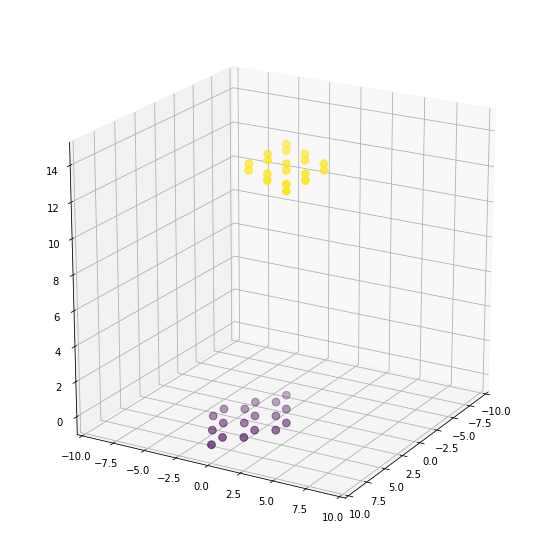

In [16]:
#now we want to plot our grid in 3D

#the scatter plot below shows the positions of the two layers of graphene

fig = plt.figure(figsize= (10,10))
ax = plt.axes(projection='3d')

ax.scatter3D(xarray, yarray, zarray, c = zarray, s = 60)
plt.xlim(-10, 10)
plt.ylim(-10, 10)


plt.gca().set_aspect('equal', adjustable='box') 
ax.view_init(elev=20, azim=30)
        
plt.draw()

### Appending the Hamiltonians

In [10]:
#we can try generating the Hamiltonians separately and afterwards append them 

#Hamiltonian of the bottom layer NON TWISTED

"""H1 = Hamiltonian(g1)


for ia,io in H1:
  idx = H1.geom.close(ia, R = [0.1, 1.43])
  
  H1[io, idx[0]] = 0
  H1[io, idx[1]] = -2.7

H2 = Hamiltonian(g2)

for ia,io in H2:
  idx = H2.geom.close(ia, R = [0.1, 1.43])
  
  H2[io, idx[0]] = 0
  H2[io, idx[1]] = -2.7
  
print(H1)
print(H2)


Hfinal = H1.append(H2, axis = 0)"""

#this method doesn't work due to the appending of hamiltonians, we want to append the structures

#investigate the eps value
#the default eps value is 0.01
#it needs to be smaller than half the distance between neighbouring atoms 
#this is to avoid confusion selecting equivalent atoms


#THIS METHOD DOES NOT WORK. DONT TRY

'H1 = Hamiltonian(g1)\n\n\nfor ia,io in H1:\n  idx = H1.geom.close(ia, R = [0.1, 1.43])\n  \n  H1[io, idx[0]] = 0\n  H1[io, idx[1]] = -2.7\n\nH2 = Hamiltonian(g2)\n\nfor ia,io in H2:\n  idx = H2.geom.close(ia, R = [0.1, 1.43])\n  \n  H2[io, idx[0]] = 0\n  H2[io, idx[1]] = -2.7\n  \nprint(H1)\nprint(H2)\n\n\nHfinal = H1.append(H2, axis = 0)'

## Twisted Graphene Hamiltonian 

In order to calculate the Hamiltonian for a system with two layers of graphene, where the top layer is twisted at some angle (wrt to the bottom one). The total Hamiltonian of the system is the following: 

$$ H = H_1 + H_2 + H_{int} $$

$ H_1 $ refers to the Hamiltonian of the bottom layer, $ H_2 $ refers to the Hamiltonian of the top layer, and $H_{int} = \gamma_{int}e^{(r_{ij} - d)\beta}$ is the interaction Hamiltonian between the two layers, where $d$ is the interlayer separation and $\beta = 3$ and $\gamma_1 = 0.39 $ are constants. $\gamma_1$ is the interlayer nearest neighbour hopping integral. $ r_{ij}$ is the distance between atom i in the top layer and atom j in the bottom one. The value of $\beta$ reproduces perfectly the bands calculated with DFT. 

We will consider $r_{ij}$ and $d$ scalars. By choosing this interaction Hamiltonian, we are taking into account that the unit cell is complex and that the distances between atoms are all different. 

We let every atom in the top layers interact with the atoms in the bottom layer within a radius of $3a_0$.

In [0]:
Hfinal = Hamiltonian(gfinal)

#setting the normal values for onsite and nearest neighbours
for ia,io in Hfinal:
  idx = Hfinal.geom.close(ia, R = [0.1, 1.43])
  
  H1[io, idx[0]] = 0
  H1[io, idx[1]] = -2.7
  
#the rest of the values would be like the ones explained in the markdown above 